In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()
# reflect the tables


['measurement', 'station']

In [6]:
# View all of the classes that automap found
MEA = Base.classes.measurement
STA = EA = Base.classes.station

In [7]:
# Save references to each table


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
date = session.query(func.max(MEA.date)).first()
date[0]

'2017-08-23'

<Axes: xlabel='date'>

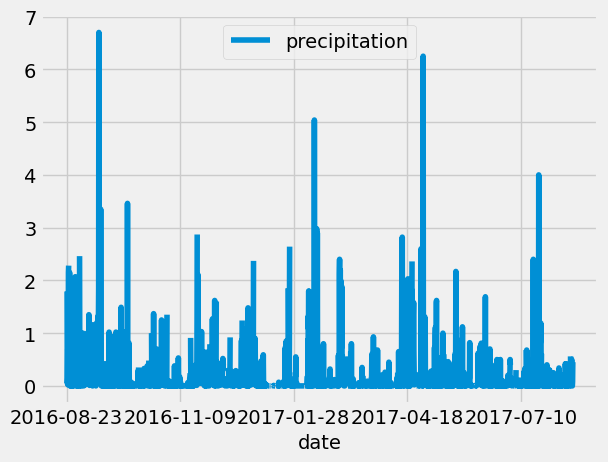

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23)- dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(MEA.date, MEA.prcp)
results.all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results= session.query(MEA.date, MEA.prcp).filter(MEA.date >=prev_year)
results= session.query(MEA.date, MEA.prcp).filter(MEA.date >=prev_year).all()

df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
df = df.sort_index()

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_numbers= session.query(STA.name).count()
print(station_numbers)

9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(MEA.station, func.count(MEA.station)).\
    group_by(MEA.station)

session.query(MEA.station, func.count(MEA.station)).\
group_by(MEA.station).order_by(func.count(MEA.station).desc()).all()



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query()
session.query(func.min(MEA.tobs), func.max(MEA.tobs), func.avg(MEA.tobs))
session.query(func.min(MEA.tobs), func.max(MEA.tobs), func.avg(MEA.tobs)).\
filter(MEA.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


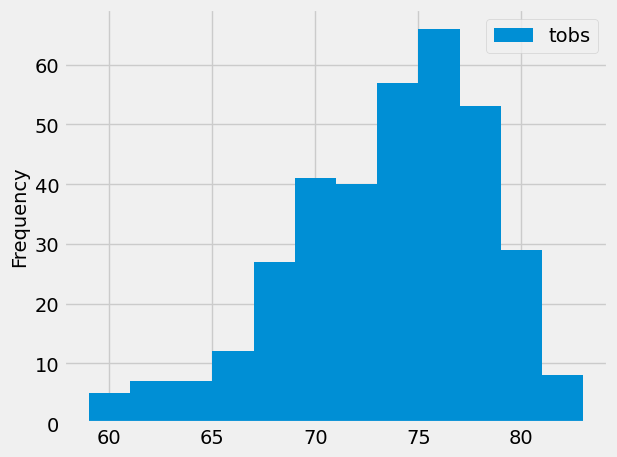

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obsv = session.query(MEA.tobs).\
    filter(MEA.station == 'USC00519281').\
    filter(MEA.date >= prev_year).all()

df= pd.DataFrame(temp_obsv, columns=['tobs'])
print(df)

#12 months 
df.plot.hist(bins=12)
plt.tight_layout()

# Close Session

In [16]:
# Close Session
session.close()

In [17]:
from flask import Flask, jsonify



#################################################
# Flask Setup
#################################################
app = Flask(__name__)


#################################################
# Flask Routes
#################################################

@app.route("/api/v1.0/justice-league")
def justice_league():
    """Return the justice league data as json"""

    return jsonify(justice_league_members)


@app.route("/")
def welcome():
    return (
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<start><br/>"
        f"/api/v1.0/<start>/<end><br/>"
    )

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

c:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
